In [1]:
import yfinance as yf
import pandas as pd

In [2]:
# List of companies/tickers from different sectors
tickers = {
    'Apple': 'AAPL',           # Technology
    'Google': 'GOOGL',         # Technology
    'Microsoft': 'MSFT',       # Technology
    'Tesla': 'TSLA',           # Automotive
    'Amazon': 'AMZN',          # Retail
    'Johnson & Johnson': 'JNJ',# Healthcare
    'Exxon Mobil': 'XOM',      # Energy
    'JPMorgan Chase': 'JPM'    # Financials
}

# Create an empty DataFrame to store data
all_data = pd.DataFrame()

# Fetch data for each ticker
for company, ticker in tickers.items():
    print(f"Fetching data for {company} ({ticker})")
    data = yf.download(ticker, start='2020-01-01', end='2024-08-21')
    data['Company'] = company  # Add company name as a column
    data['Ticker'] = ticker    # Add ticker as a column
    all_data = pd.concat([all_data, data])

# Save the data to a CSV file
all_data.to_csv('sector_diverse_stock_data.csv')

print("Data collection complete and saved to sector_diverse_stock_data.csv")


Fetching data for Apple (AAPL)


[*********************100%%**********************]  1 of 1 completed


Fetching data for Google (GOOGL)


[*********************100%%**********************]  1 of 1 completed


Fetching data for Microsoft (MSFT)


[*********************100%%**********************]  1 of 1 completed


Fetching data for Tesla (TSLA)


[*********************100%%**********************]  1 of 1 completed


Fetching data for Amazon (AMZN)


[*********************100%%**********************]  1 of 1 completed


Fetching data for Johnson & Johnson (JNJ)


[*********************100%%**********************]  1 of 1 completed


Fetching data for Exxon Mobil (XOM)


[*********************100%%**********************]  1 of 1 completed


Fetching data for JPMorgan Chase (JPM)


[*********************100%%**********************]  1 of 1 completed

Data collection complete and saved to sector_diverse_stock_data.csv


In [9]:
data = pd.read_csv('sector_diverse_stock_data.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Company,Ticker
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,72.876099,135480400,Apple,AAPL
1,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.167618,146322800,Apple,AAPL
2,2020-01-06,73.447502,74.989998,73.187500,74.949997,72.742645,118387200,Apple,AAPL
3,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.400551,108872000,Apple,AAPL
4,2020-01-08,74.290001,76.110001,74.290001,75.797501,73.565201,132079200,Apple,AAPL


In [10]:
data.size

83952

In [11]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
Company       object
Ticker        object
dtype: object

In [12]:
print(data.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Company      0
Ticker       0
dtype: int64


In [13]:
data['Date'] = pd.to_datetime(data['Date'])
print(data.dtypes)

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
Company              object
Ticker               object
dtype: object


In [14]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

In [15]:
# Calculate the daily return
data['Daily Return'] = data.groupby('Ticker')['Adj Close'].pct_change()

# Fill any resulting NaN values
data['Daily Return'].fillna(0, inplace=True)


In [16]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Company,Ticker,Year,Month,Day,Daily Return
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,72.876099,135480400,Apple,AAPL,2020,1,2,0.000000
1,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.167618,146322800,Apple,AAPL,2020,1,3,-0.009722
2,2020-01-06,73.447502,74.989998,73.187500,74.949997,72.742645,118387200,Apple,AAPL,2020,1,6,0.007968
3,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.400551,108872000,Apple,AAPL,2020,1,7,-0.004703
4,2020-01-08,74.290001,76.110001,74.290001,75.797501,73.565201,132079200,Apple,AAPL,2020,1,8,0.016086


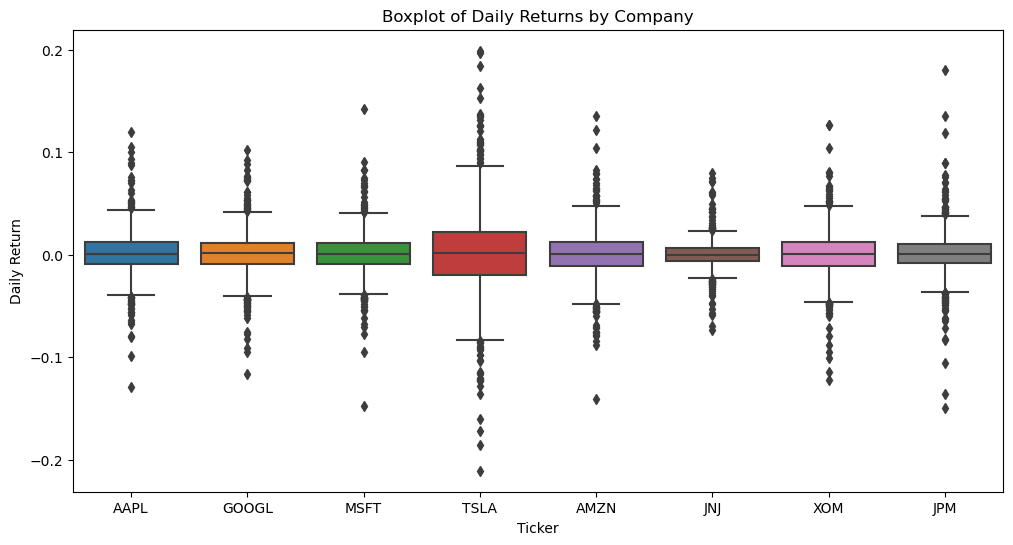

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot to detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x='Ticker', y='Daily Return', data=data)
plt.title('Boxplot of Daily Returns by Company')
plt.show()

In [18]:
data = data[(data['Daily Return'] >= -3*data['Daily Return'].std()) &
            (data['Daily Return'] <= 3*data['Daily Return'].std())]

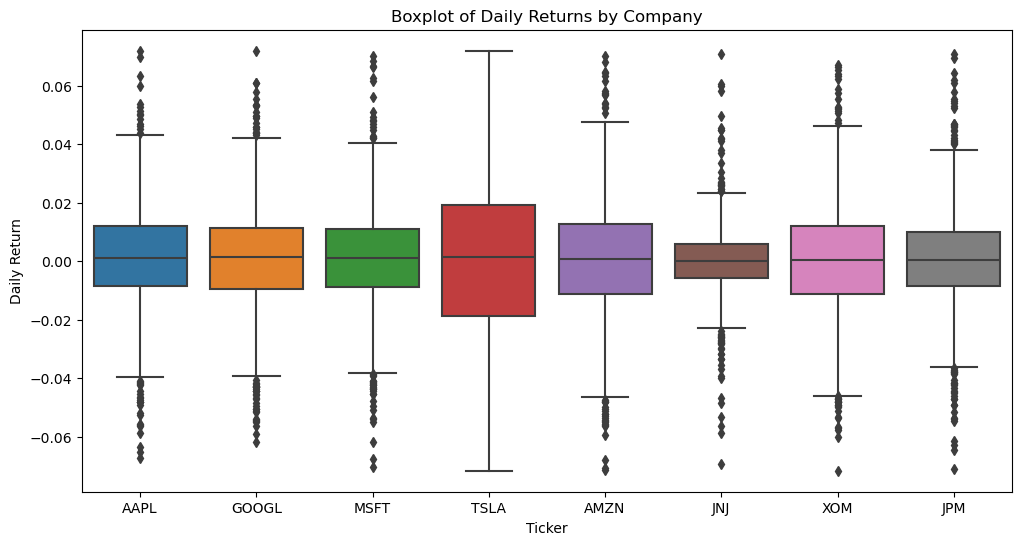

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Ticker', y='Daily Return', data=data)
plt.title('Boxplot of Daily Returns by Company')
plt.show()

In [20]:
from sklearn.preprocessing import MinMaxScaler

# Select columns to scale (e.g., Open, High, Low, Close, Volume)
cols_to_scale = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the data
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])

# Display the first few rows to verify
print(data.head())

        Date      Open      High       Low     Close  Adj Close    Volume  \
0 2020-01-02  0.104308  0.105625  0.108199  0.106103   0.107907  0.200772   
1 2020-01-03  0.104827  0.105614  0.108946  0.104441   0.106303  0.217094   
2 2020-01-06  0.102912  0.105261  0.106806  0.105790   0.107605  0.175039   
3 2020-01-07  0.106360  0.105796  0.109506  0.104987   0.106830  0.160715   
4 2020-01-08  0.104832  0.107809  0.109323  0.107720   0.109468  0.195652   

  Company Ticker  Year  Month  Day  Daily Return  
0   Apple   AAPL  2020      1    2      0.000000  
1   Apple   AAPL  2020      1    3     -0.009722  
2   Apple   AAPL  2020      1    6      0.007968  
3   Apple   AAPL  2020      1    7     -0.004703  
4   Apple   AAPL  2020      1    8      0.016086  


In [21]:
# One-hot encoding for Ticker symbols
data = pd.get_dummies(data, columns=['Ticker'])

# Display the first few rows to verify
print(data.head())


        Date      Open      High       Low     Close  Adj Close    Volume  \
0 2020-01-02  0.104308  0.105625  0.108199  0.106103   0.107907  0.200772   
1 2020-01-03  0.104827  0.105614  0.108946  0.104441   0.106303  0.217094   
2 2020-01-06  0.102912  0.105261  0.106806  0.105790   0.107605  0.175039   
3 2020-01-07  0.106360  0.105796  0.109506  0.104987   0.106830  0.160715   
4 2020-01-08  0.104832  0.107809  0.109323  0.107720   0.109468  0.195652   

  Company  Year  Month  Day  Daily Return  Ticker_AAPL  Ticker_AMZN  \
0   Apple  2020      1    2      0.000000         True        False   
1   Apple  2020      1    3     -0.009722         True        False   
2   Apple  2020      1    6      0.007968         True        False   
3   Apple  2020      1    7     -0.004703         True        False   
4   Apple  2020      1    8      0.016086         True        False   

   Ticker_GOOGL  Ticker_JNJ  Ticker_JPM  Ticker_MSFT  Ticker_TSLA  Ticker_XOM  
0         False       False   